# NumPy intro

* js (jserences@ucsd.edu), June 2022 for CSHL

* Allows fast matrix operations and is the core numerical computing package for python

-  [full list of routines](https://docs.scipy.org/doc/numpy-dev/reference/routines.html#routines)

In [1]:
# import numpy and other stuff for this tutorial
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

## Initialize a numpy array object and do a few basic operations
* the numpy array class, or object, is referred to as a **ndarray** 

In [2]:
# set up an array and figure out shape...    
my_array = np.arange(10)    # the interval includes `start` but excludes `stop`, overal interval [start...stop-1]
print(my_array)
my_array.shape     

[0 1 2 3 4 5 6 7 8 9]


(10,)

In [3]:
# reshape array
my_array = np.arange(10)
print(my_array.shape)   

my_array = my_array.reshape(2,5)   # why is (2,5) and (5,2) ok but (2,6) not ok? 
print(my_array.shape)   
print(my_array)

# can also directly re-assign the shape
my_array.shape = 5,2
print(my_array.shape)
print(my_array)

(10,)
(2, 5)
[[0 1 2 3 4]
 [5 6 7 8 9]]
(5, 2)
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


In [4]:
# neat trick...can also reshape with 'shape' and use a -1 which means 'whatever works' 
# be careful though - better to not leave things to chance and to be explicit whenever possible
my_array = np.arange(42)
my_array.shape = 2,3,-1
print(my_array)
my_array.shape

[[[ 0  1  2  3  4  5  6]
  [ 7  8  9 10 11 12 13]
  [14 15 16 17 18 19 20]]

 [[21 22 23 24 25 26 27]
  [28 29 30 31 32 33 34]
  [35 36 37 38 39 40 41]]]


(2, 3, 7)


## SUPER DUPER IMPORTANT THING - read this!
    
Matlab and Fortran use column-major layout by default, whereas C and C++ and Python use row-major layout. This refers to how information in multiple dim arrays are stored in memory (whether column elements are contiguous in memory or row elements are contiguous). 

Since Matlab and Python use different defaults, it is super important that you keep this in mind if you are transitioning to python from matlab, esp if you are translating analysis code that requires reshaping or other matrix manipulations (you will get different results). If you want to emulate the matlab way in your python code, you can specify column-major order explicitly. For example, you can do:
    
`np.reshape(new_dims, order='F')`
    
to obtain column major operations (with the `F` standing for Fortran order)
    
[row vs column major order](https://en.wikipedia.org/wiki/Row-_and_column-major_order)
    


## Transpose array - swap row/column in 2D array

In [5]:
my_array = np.arange(100)
my_array = my_array.reshape(5,20)
my_array.shape
my_array = my_array.T
my_array.shape

(20, 5)

## data types (and remember - strong typed language)

In [6]:
print('Dims of data: ', my_array.ndim)                              # number of dims
print('Size of each element (bytes): ', my_array.itemsize)          # size of each element in bytes
print('Total number of elements in array: ', my_array.size)         # total number of elements in array
print('Name of data type: ', my_array.dtype.name)                   # name of data type (float, int32, int64 etc)

Dims of data:  2
Size of each element (bytes):  8
Total number of elements in array:  100
Name of data type:  int64


In [7]:
# will infer data type based on input values...here we have 1 float so the whole thing is float
float_array = np.array([1.2,2,3])  
float_array.dtype.name             # or np.dtype

'float64'

<div class="alert alert-success">
what happens if you initialize with floating point numbers but you declare an int data type?
</div>

In [8]:
int_array = np.array([[1.1,2.7,3.4], [6.9,7.5,8.2]], dtype = 'int32')   # complex, float32, float64, int32, uint32 (unsigned int32), etc
int_array

array([[1, 2, 3],
       [6, 7, 8]], dtype=int32)

## Allocate arrays of zeros, ones or rand to pre-allocate memory before filling up later
* handy when you know what size you need, but you're not ready to fill it up yet...
* saves you from dynamically resizing the matrix during analysis, which is **very slow**
* if you fill with zeros/ones, can be handy for matrix operations
* filling with NaNs is also a way to check for errors in how you fill up the matrix
* specify size as a tuple if N-D array where N>1 (because size is one input param, even if it is multiple numbers)

In [9]:
# note the () around the dims because you specify as a tuple...default type is float64
zero_array = np.zeros( (3,4) )   
print('Data type:', zero_array.dtype)

Data type: float64


In [10]:
# explicitly declare data type
zero_array = np.zeros( (3,4), dtype = np.int32)   
print('Data type:', zero_array.dtype)
print(zero_array)

Data type: int32
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [11]:
# ones
# note the 3D output below...4, 4x4 squares of floating point 1s...
np.ones( (4,4,4), dtype=np.float64 ) * 10     

array([[[10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.]],

       [[10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.]],

       [[10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.]],

       [[10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.],
        [10., 10., 10., 10.]]])

### Initialize the array to some arbitrary value with np.full
* useful for filling up array with 'not a number' (nan)
* super useful for bug checking

In [12]:
# nan's!!! (not a number)
np.full( (10,10), np.nan)

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]])

### Simple example of bug checking with NaNs. Suppose you allocate an array that is 10 elements long and you want to fill it up. However, you make a mistake and don't actually fill up all of the slots. Easy to spot-check this if you init the array with NaNs

In [13]:
x = np.full(10, np.nan)

#####
# 4,000 lines of code later...
#####

# then fill up every slot witha 1s (incorrectly)
x[0:8] = 1
print(x)

# spot-check to see if there is an error
if np.any(np.isnan(x)):   # or np.sum(np.isnan(x))
    print('messed up array filling!!!')

[ 1.  1.  1.  1.  1.  1.  1.  1. nan nan]
messed up array filling!!!


## Can also create sequences of numbers using arange...
* For integer arguments the function is equivalent to the Python built-in range function, but returns an ndarray rather than a list.
* same notation: start, stop, step
* unlike classic range function, can take decimal step size...but be careful! 

In [14]:
# can specify start, stop and step
seq_array = np.arange(0,30,5)         # start, stop (exclusive), step size
print(seq_array)
# note that 30 is not in there...

[ 0  5 10 15 20 25]


In [15]:
seq_array = np.arange(0,10,.56788)    # decimal input is ok too (and again - stop is NOT included)
print(seq_array)

[0.      0.56788 1.13576 1.70364 2.27152 2.8394  3.40728 3.97516 4.54304
 5.11092 5.6788  6.24668 6.81456 7.38244 7.95032 8.5182  9.08608 9.65396]


<div class="alert alert-info">
Because of machine precision issues, sometimes hard to predict how many elements will end up in an array when initialized using arange...so often better to specify a sequence based on start point, stop point, and the exact number of elements that you want (or the number of steps between start and stop). linspace (linear spacing) is the function to do this, and note that unlike arange that ends < stop point, linspace will always end exactly at the specified stop point. 
</div>

In [16]:
# start, stop, number of linearly spaced steps between start and stop...note that start AND stop included!
lin_array = np.linspace(0,180,9) 
print(lin_array)

[  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180. ]


## One common use of linspace...eval a function over an interval. quick intro to basic plotting here too (and more on plotting later in a separate tutorial)

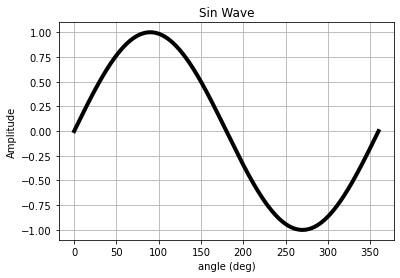

In [17]:
x = np.linspace(0, 2*pi, 360)
sin_wave = np.sin(x)

# plotting - note conversion of x values back to degrees for easier human readability
h = plt.plot(x*180/pi, sin_wave, 'k-', linewidth = 4)    # specify x,y data...convert rad to deg for x-axis

# label each axis and give it a title
plt.xlabel('angle (deg)')
plt.ylabel('Amplitude')
plt.title('Sin Wave')
plt.grid(1)
plt.show()

## Initializing arrays with random numbers...use np.random.rand
* will use this a LOT to simulate data
* specify size of desired array rows x columns
* note: this is a 'wrapper' function for random_sample. 
    * mostly made for recovering matlabbers and somewhat thus somewhat annoyingly does not take its array size input as a tuple like np.zeros (ones, full, etc) do. If you look at random_sample, it takes a tuple 
    * while this makes the input format different from numpy functions, it only takes one possible input so not too confusing.
* **Important** NOT truly random! Instead pseudo-random numbers generated using a deterministic algorithm. If you know the seed value of the algorithm (starting point), then you can reproduce the exact sequence

In [18]:
rand_array = np.random.rand(2,4)   # drawn from uniform over [0,1]
print(rand_array)

[[0.78052512 0.17306235 0.32732726 0.16373576]
 [0.20871772 0.97335999 0.30778596 0.38637234]]


### Not truly random!!!
* always set and save the random seed when doing any kind of simulation or stimulus presentation coding...that way you can go back and reproduce the exact same "random" sequence later on... 

In [19]:
np.random.seed(0)
rand_array = np.random.rand(10)
print(rand_array)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]


### Super handy tip: to make draws from a uniform random across a range a-b where a and b are not 0 and 1, use:
`(b - a) * np.random.rand() + a`

In [20]:
a = 100   # max
b = 75    # min
r = 6     # num rows
c = 4     # num cols
 
(b - a) * np.random.rand(6,4) + a

array([[80.20687405, 86.77762701, 85.79888597, 76.86008404],
       [98.22409855, 97.82176751, 99.49454006, 79.18450386],
       [80.54608123, 78.24969629, 75.53454144, 80.02103589],
       [88.46301594, 80.48677059, 97.04313935, 84.00197447],
       [96.41616781, 76.38327707, 86.95379196, 89.6334515 ],
       [93.3861097 , 80.64415776, 88.59624169, 85.78915128]])

### Another neat trick to get a random assortment of 0s and 1s (e.g., to simulate coin flips in a model or in stimulus presentation software)

In [21]:
print(np.round(rand_array))

[1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]


## Simple elementwise arithmetic operations like *, /, + and - work on corresponding elements of arrays (i.e., element-by-element operation) 
* This is where a lot of speed improvements can be had over traditional python code because instead of, for example, doing element-by-element multiplication using a for loop you can do it all in one line and numpy will optimize the operation behind the scenes. 


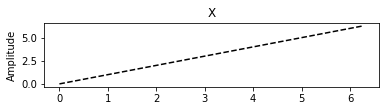

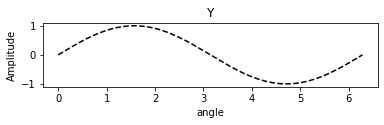

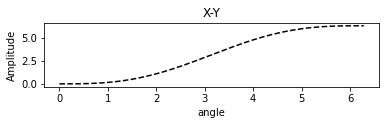

In [22]:
x = np.linspace(0,2*pi,360)
y = np.sin(x)

plt.subplot(3, 1, 1)
plt.plot(x, x, 'k--')
plt.title('X')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(3, 1, 2)
plt.plot(x, y, 'k--')
plt.title('Y')
plt.xlabel('angle')
plt.ylabel('Amplitude')
plt.show()

plt.subplot(3, 1, 3)
plt.plot(x, x-y, 'k--')
plt.title('X-Y')
plt.xlabel('angle')
plt.ylabel('Amplitude')

plt.show()

## Element by element multiplication...normal python vs numpy 
* use the `%timeit` line magic to run the code a bunch of times to eval how long it takes

In [23]:
N = 1000000

In [24]:

x = np.linspace(0,100,N)
y = np.linspace(0,100,N)

out = np.zeros(len(y))

%timeit for n in range(len(y)): out[n] = x[n] * y[n]

289 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:


x = np.linspace(0,100,N)
y = np.linspace(0,100,N)

%timeit out = x * y

708 µs ± 43.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Unary operations (operation with single operand) 
* Can be implemented as methods of the numpy array class (or numpy array object)
* Or can be implemented via a call to a numpy function that is applied to a numpy array class
* These will have the same outcome, just depends on usage/style

In [26]:
# methods of the np array class
x = np.arange(10).reshape(2,5)   # make a 2 x 5 matrix
print(x)

x.sum()                          # sum of all elements
print(x.sum(axis=0))             # sum of each column (across 1st dim)
print(x.sum(axis=1))             # sum of each row (across 2nd dim)
print(x.sum(0))                  # don't need the axis arg, but always use it!

[[0 1 2 3 4]
 [5 6 7 8 9]]
[ 5  7  9 11 13]
[10 35]
[ 5  7  9 11 13]


In [27]:
# np functions applied to instances of np array class
x = np.arange(10).reshape(2,5)   # make a 2 x 5 matrix
print(x)

print(np.sum(x))                 # sum of all elements
print(np.sum(x, axis=0))         # sum of each column (across 1st dim)
print(np.sum(x, axis=1))         # sum of each row (across 2nd dim)
print(np.sum(x, 0))              # don't need the "axis" keyword, but always use it for bonus style points!

[[0 1 2 3 4]
 [5 6 7 8 9]]
45
[ 5  7  9 11 13]
[10 35]
[ 5  7  9 11 13]


## Other common methods/functions...

In [28]:
# used as methods...
print(x.min())           # min of entire matrix
print(x.min(axis=0))     # min across 1st dim
print(x.max(axis=1))          # max across 2nd dim
print(x.prod())               # product of all elements
print(x.cumprod(axis=1))      # cumulative product across 2nd dim

0
[0 1 2 3 4]
[4 9]
0
[[    0     0     0     0     0]
 [    5    30   210  1680 15120]]


In [29]:
# used as functions
print(np.min(x))           # min of entire matrix
print(np.min(x, axis=0))     # min across 1st dim
print(np.max(x, axis=1))          # max across 2nd dim
print(np.cumprod(x, axis=1))      # cumulative product across 2nd dim

0
[0 1 2 3 4]
[4 9]
[[    0     0     0     0     0]
 [    5    30   210  1680 15120]]


## Indexing and slicing and iterating in NumPy
* For 1D np arrays, works like the list objects that we've been working with in earlier tutorials. 

In [30]:
# create a 1d array
x = np.linspace(0,9,10)
print(x)
x[1]                     # just the second entry, remember 0 based indexing

# specific start and stop points (exclusive)
x[0:2]                   # the first and second entries in the array, so N>=0 and N<2 (note the < upper bound - not inclusive)

# assign the 2nd - 4th element to 100 (index 1,2,3)
x[1:4] = 100               
print(x[1:4])

# start, stop, step interval
print(x[0:8:2])

# reverse x
print(x[::-1])

# iterate over all elements in x
for i in x:
    print(i*3)    # then i takes the value of each element in x
    

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[100. 100. 100.]
[  0. 100.   4.   6.]
[  9.   8.   7.   6.   5.   4. 100. 100. 100.   0.]
0.0
300.0
300.0
300.0
12.0
15.0
18.0
21.0
24.0
27.0


## Multidimentional array indexing, slicing etc

In [31]:
x = np.round(np.random.rand(10,5)*10)   # generate a matrix of uniformly distributed random numbers over 0:10
print(x)

[[ 0.  6.  6.  6.  9.]
 [ 7.  4.  4.  7.  1.]
 [ 7.  7.  2.  1.  3.]
 [ 4.  6.  4. 10.  1.]
 [ 2.  2.  7.  3.  5.]
 [ 2.  2.  1.  7.  1.]
 [ 2.  4.  8.  1.  8.]
 [ 1. 10.  5. 10.  6.]
 [ 7.  0.  3.  1.  3.]
 [ 1.  3.  4.  1.  7.]]


In [32]:
x[0,0]     # first row, first column
x[2,3]     # third row, 4th column

1.0

In [33]:
x[:, 3]    # all entries in the 4th column 
x[3, :]    # all entries in the 4th row
x[0:2, 4]  # first two entries of the 5th column
x[6, 2:4]  # 7th row, 3rd and 4th entries. 

array([8., 1.])

In [34]:
x[6]       # if not all dims specified then missing values are considered complete slices
x[6,]      # these three ways of writing all do the same thing...
x[6,:]

array([2., 4., 8., 1., 8.])

In [35]:
# tricks...
print('last row: ', x[-1,:])     # last row
print('last column: ', x[:,-1])  # last column
print('last entry: ', x[-1,-1])  # last value

last row:  [1. 3. 4. 1. 7.]
last column:  [9. 1. 3. 1. 5. 1. 8. 6. 3. 7.]
last entry:  7.0


### Pull out subset of rows and columns

In [36]:
# generate a matrix of random numbers over 0-1
x = np.random.rand(4,3) 
print(x)

# first two rows - note that you don't have to specify the 2nd dim - and note that 
# '2' here means rows 0 and 1 (i.e., just the first two rows, exclusive of row 2!)
y = x[:2] 
print('\n', y)

# can also take the last two rows...in the same manner...in this case rows 3 and 4
y = x[2:] 
print('\n', y)

# first two rows, 1st column
y = x[:2,0] 
print('\n', y)

# rows 3 - end, columns 2 - end
y = x[2:,1:]
print('\n', y)

[[0.56660145 0.26538949 0.52324805]
 [0.09394051 0.5759465  0.9292962 ]
 [0.31856895 0.66741038 0.13179786]
 [0.7163272  0.28940609 0.18319136]]

 [[0.56660145 0.26538949 0.52324805]
 [0.09394051 0.5759465  0.9292962 ]]

 [[0.31856895 0.66741038 0.13179786]
 [0.7163272  0.28940609 0.18319136]]

 [0.56660145 0.09394051]

 [[0.66741038 0.13179786]
 [0.28940609 0.18319136]]


## Use conditionals (boolean test) to index into arrays
* for example: find all entries less than 15
* or less than 15 or greater than 100...etc.

In [37]:
# random uniform data over 0-200
np.random.seed(0)
x = np.random.rand(100) * 200

# find only the values that are less than 15
less15 = x[x<15]
print(less15)

# use & (and), | (or)
less15_great100 = x[(x<15) | (x>100)]
print(less15_great100)

[14.20721164  4.04367949  3.75796009 12.04509433  7.83755845 12.82949927
  4.02150924  0.93909524]
[109.76270079 143.03787327 120.55267521 108.9766366  129.17882261
 178.35460016 192.7325521  158.34500762 105.77898395 113.60891222
 185.11932766  14.20721164   4.04367949 166.52396911 155.63135019
 174.00242965 195.72366845 159.83171284 156.10583526 127.98420427
 188.93378341 104.36966435 154.84673789 113.68678977   3.75796009
 123.52709942 122.41914454 123.38679937 188.7496157  136.36405982
 139.52623919  12.04509433 133.35334309 134.12757392 114.03935408
 197.67476761 130.62166509 131.26591789 164.19864597 167.5889815
 195.291893   195.35221764 120.96910395 147.85271588   7.83755845
  12.82949927 138.49442387 113.32029084 104.64961069 115.18929911
 185.85923952 133.48207599 143.26544082 117.30258696   4.02150924
 165.78800584   0.93909524]


## Important - unlike a list, slicing an array creates a view of it! if you change the view, you also will change the original data!
* A view means that two (or more) variables are referencing the same location (data) in memory...
* This will be weird for those coming from Matlab...it can be effecient though in some cases to save memory
* But critical to be aware of this or you will pull all of your hair out trying to track down the ghost in the machine that is magically changing your data...
* Below are a few approaches but I suggest using the explict `copy()` approach just to be safe and easy to read

In [38]:
x = np.random.randn(4,4)

# assign a new variable 'z' to x
# note this will create a view, not a copy!
z = x

# change all values in z using [:]
z[:]=100     # so if you change data in z it will also change in x

# then print x - even though you never 
# explicitly changed x, changing z modified the shared data
print(x)

[[100. 100. 100. 100.]
 [100. 100. 100. 100.]
 [100. 100. 100. 100.]
 [100. 100. 100. 100.]]


## Use copy instead if you want independent data...

In [39]:
x = np.random.randn(4,4)

# assign using the copy method
# this will copy the data in x
# and assign to new variable z
z = x.copy()

# change all values in z using [:]
z[:]=100     # so if you change data in z it will also change in x

# now they are independent and changing one does not change the other
print(x)

[[ 0.01050002  1.78587049  0.12691209  0.40198936]
 [ 1.8831507  -1.34775906 -1.270485    0.96939671]
 [-1.17312341  1.94362119 -0.41361898 -0.74745481]
 [ 1.92294203  1.48051479  1.86755896  0.90604466]]
